In [23]:
#import libaries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

#Adjust the size of figure 
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,10)


In [3]:
#read in data: 
mv=pd.read_csv('movies.csv')

**Part 1: Dataset overview**

In [4]:
#Have a look at data
mv.head() 

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
#What type of each column is? 
mv.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#Change data type:
mv['budget']=mv['budget'].astype('int64')
mv['gross']=mv['gross'].astype('int64')

In [7]:
#Show basic statistic of dataset: 
mv.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


**Part 2: Clean the data**

In [8]:
#Looking for missing data: 

mv.isnull().any()

#there are no missing data in this dataset.

budget      False
company     False
country     False
director    False
genre       False
gross       False
name        False
rating      False
released    False
runtime     False
score       False
star        False
votes       False
writer      False
year        False
dtype: bool

In [9]:
#Cleaning data: 
#Sort values with the highest gross revenue: 
mv.sort_values(by='gross', ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997


**Part3: Estimate the relation of variables in the dataset** 

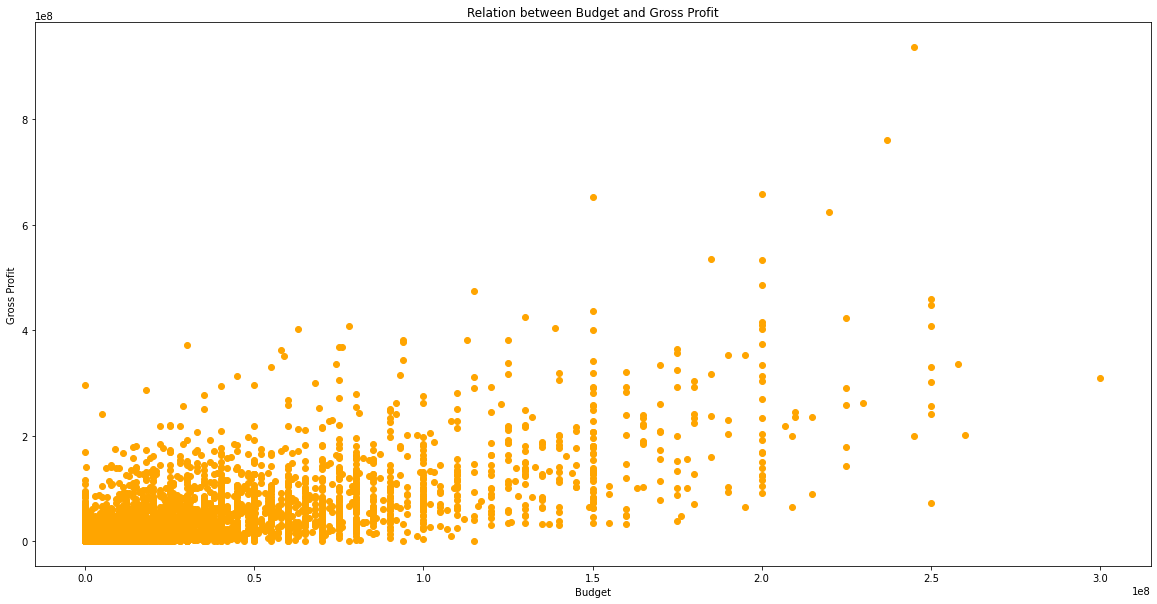

In [29]:
#I have a hypothesis the higher the budget is, the higer the gross profit.
# Let's go and check it out by using scatter plot with budget and gross in the dataset. 
#plt.figure(figsize(10,10))
plt.scatter('budget','gross',data=mv, color='orange')
plt.title('Relation between Budget and Gross Profit')
plt.xlabel('Budget')
plt.ylabel('Gross Profit')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


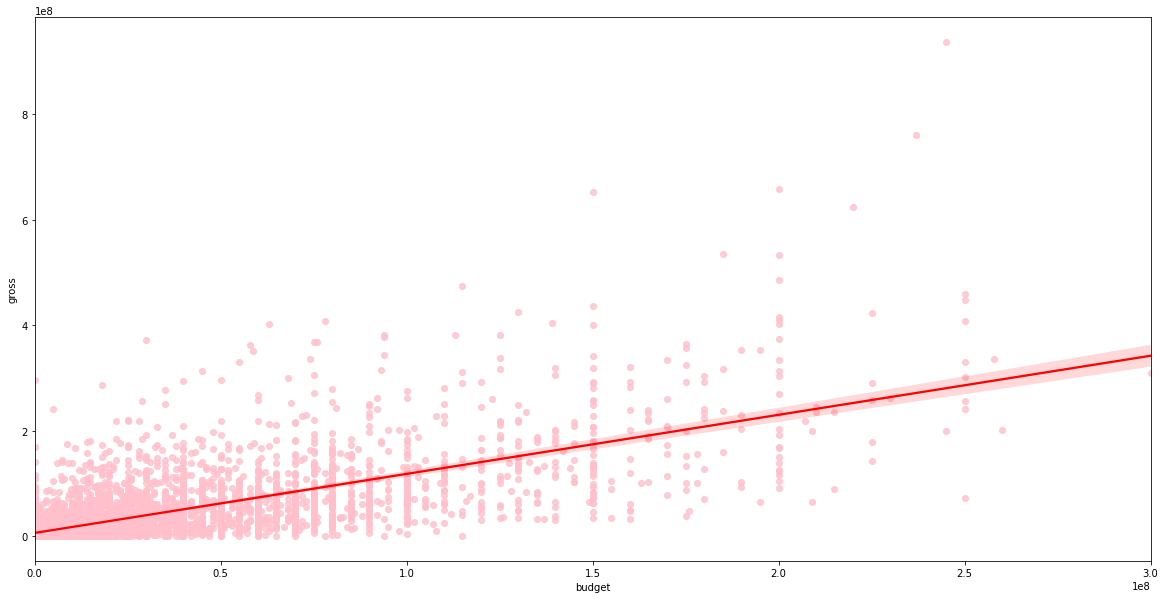

In [35]:
#Find out the corelation between budget and gross profit by regression plot: 

sns.regplot('budget','gross',data=mv, line_kws={'color':'red'}, scatter_kws={'color':'pink'})
plt.show()

#The graph clearly show that the budget and gross positively have a correlation with the higher budget gain the 
#higher gross profit

In [40]:
#Let determine what is the correlation exactly of budget and gross: 

mv.corr()

#The correlation between budget and gross is 0,712 is relatively high => So the the hypothesis at the begin is true,
#the budget and the gross profit have positive correlation.

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


Text(0.5, 1.0, 'Correlation matrix for Numeric feature')

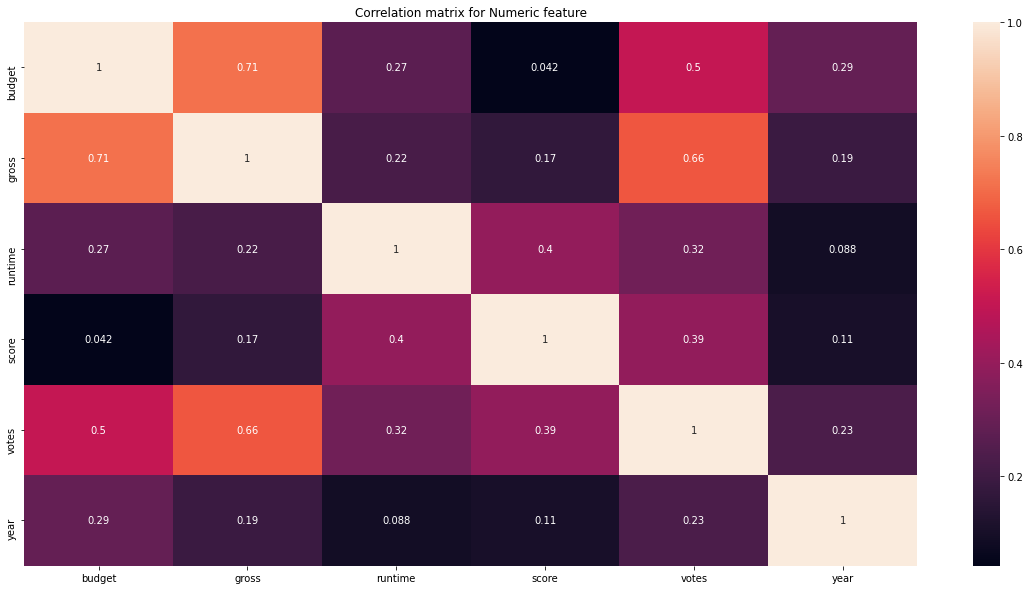

In [45]:
#Turn the correlation into graphic: 

cor_frame=mv.corr()
sns.heatmap(cor_frame, annot=True)
plt.title('Correlation matrix for Numeric feature')

**Part4: Compare the gross profit**

In [57]:
#Compare between company:

gross_com=mv.groupby('company')['gross'].sum().sort_values(ascending=False).to_frame().reset_index()
gross_com



,company,gross
0,Warner Bros.,21322318408
1,Universal Pictures,19430051320
2,Paramount Pictures,17115702495
3,Twentieth Century Fox Film Corporation,14788570587
4,Walt Disney Pictures,10455507123
...,...,...
2174,Parallel Film Productions,828
2175,Zentropa International Norway,547
2176,Isle of Man Film,542
2177,Daybreak,309


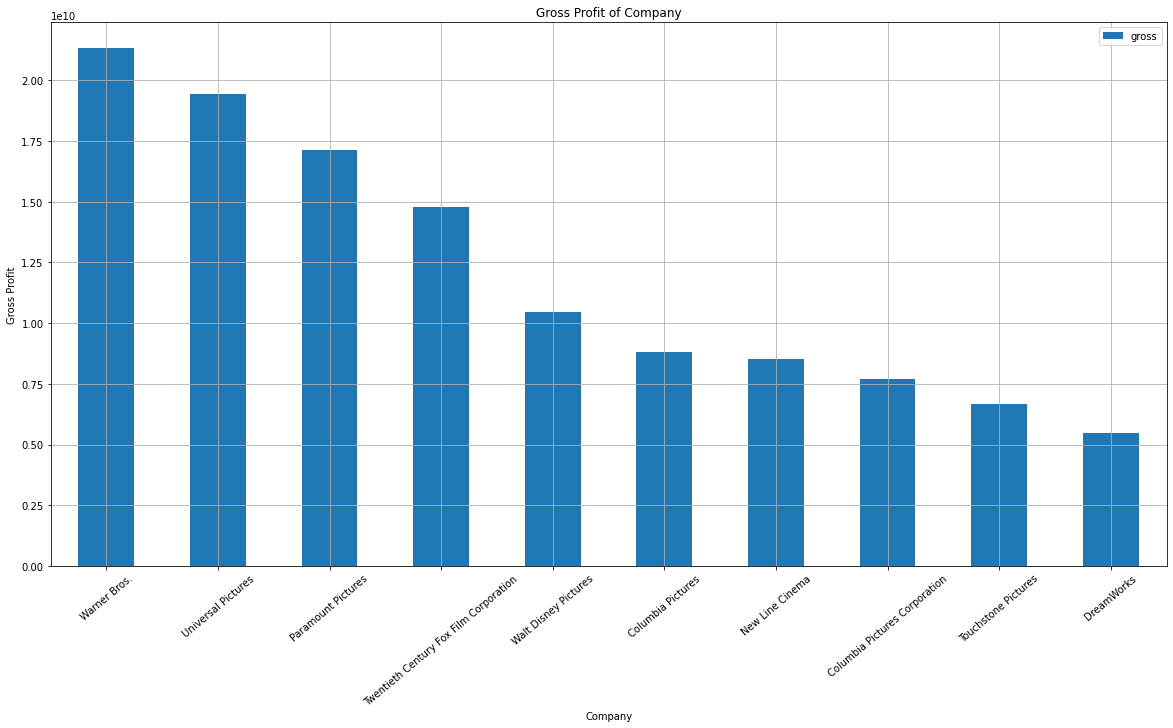

In [79]:
#Visualizate the top 10 company have the highest gross:
#To compare the gross of those companies, bar char is a good choice for easier to compare

high_gross=gross_com.head(10)
high_gross.plot.bar('company','gross', rot='40')
plt.grid(True)
plt.xlabel('Company')
plt.ylabel('Gross Profit')
plt.title('Gross Profit of Company')
plt.show()

In [83]:
#Compare profit between the genre:

genre_gross=mv.groupby('genre')['gross'].sum().to_frame().reset_index()
genre_gross

,genre,gross
0,Action,74792634664
1,Adventure,20895092830
2,Animation,25342203262
3,Biography,8617526666
4,Comedy,53543423603
5,Crime,10217836159
6,Drama,25204622256
7,Family,118110208
8,Fantasy,644653115
9,Horror,7117846856


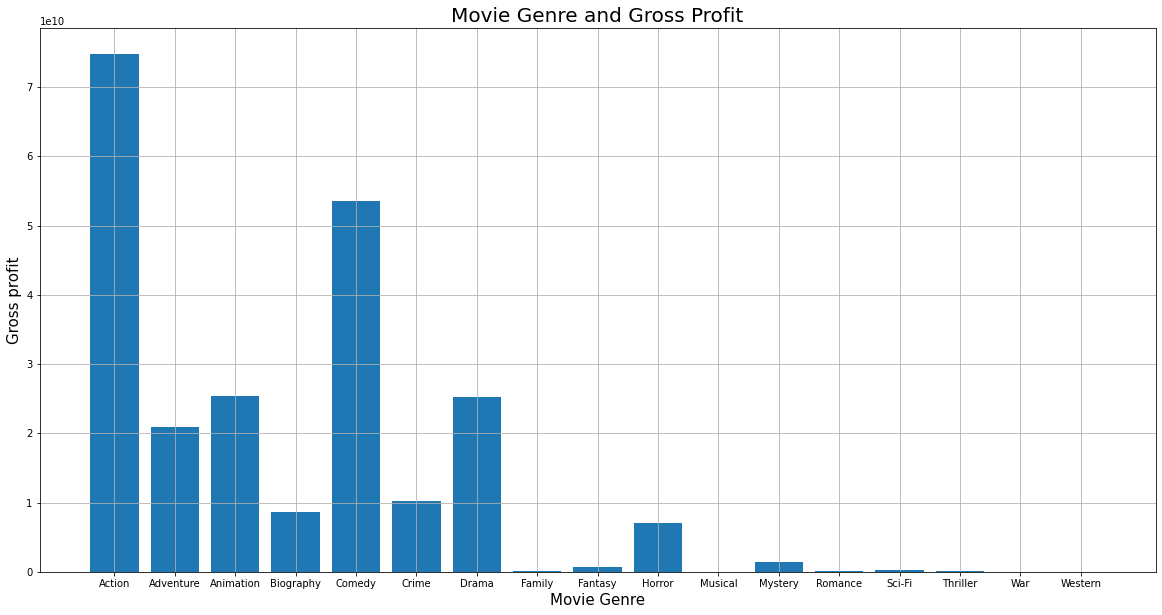

In [94]:
#Visualizate the profit of each genre:

plt.bar('genre','gross', data=genre_gross)
plt.grid(True)
plt.title('Movie Genre and Gross Profit',size='20')
plt.xlabel('Movie Genre', size='15')
plt.ylabel('Gross profit', size='15')
plt.show()

**Part 5: Conclusion**

- Conclusion 1: There is a significant correlation between budget and the gross profit of a film. There have positive correlation the higer the budget is the more the gross profit of that film. 
- Conclusion 2: Action and Comedy are the two-most best seller movie genre. That is proven through the huge revenue these two genres bring to the filmmakers. The reason for this can be those two genres can be easily to seen, audiences easily to enthuatic with the character which they are watching and they are suitable for all age.  